# Data Science Case Study- Movie Meta Data Analysis by Srinivasan Menon


Analyze the attached dataset ‘movie_metadata’ and identify the insights which can be generated from this data. The dataset has 28 variables which are explained in detail in the ‘variable description’ tab.


In [154]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [155]:
from subprocess import check_output

In [156]:
print(check_output(["ls", "./DS"]).decode("utf8"))

Capstone
Certificates-master.zip
ComprehensiveCheckMachineLearning.docx
Data Science Case Study
Data Science Case Study.zip
DataScience
Documents
GM-1.R
Harvard-Data-Science-Professional-master (1).zip
Harvard-Data-Science-Professional-master.zip
Introduction to Data Science.html
MovieLens
RegressionAnalysisByExample.pdf
UOC
correlation_analysis.csv
edx.rds
kaggle.json
ml-10m.zip
ml-10m.zip.md5
movie_metadata.xls
movie_profits_analysis.csv
movie_score_analysis.csv
top_flops_analysis.csv
top_hits_analysis.csv
total_flops_pie.csv
total_horror_flops_pie.csv
validation.rds



In [159]:
movie = pd.read_excel("./DS/movie_metadata.xls")
movie.head()
#movie.shape

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [194]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

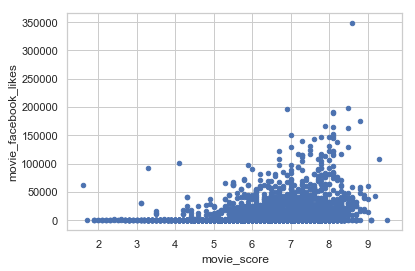

In [196]:
movie.plot( kind="scatter", x="movie_score", y="movie_facebook_likes")

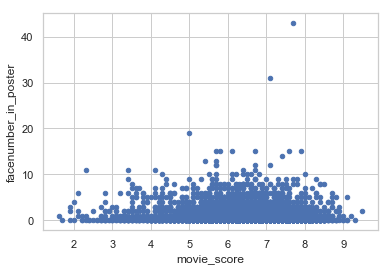

In [197]:
movie.plot( kind="scatter", x="movie_score", y="facenumber_in_poster")

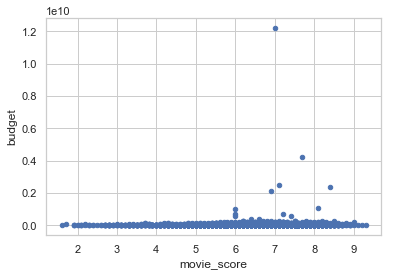

In [198]:
movie.plot( kind="scatter", x="movie_score", y="budget")

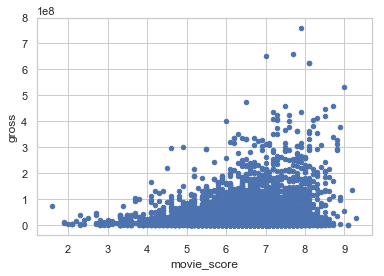

In [199]:
movie.plot( kind="scatter", x="movie_score", y="gross")

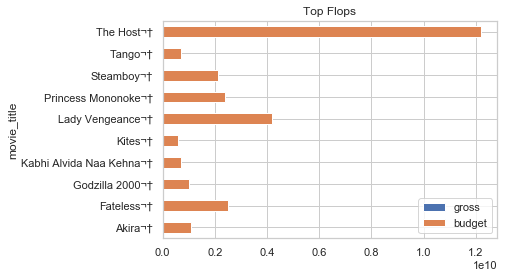

In [167]:
movies=movie
movies['profit']= movies.gross-movies.budget
top10fails  = movies.sort_values('profit').head(10); 
top10hits = movies.sort_values('profit', ascending = False).head(10); 
top10fails[['gross', 'budget']].groupby(movies['movie_title']).sum().plot.barh(stacked=True, title='Top Flops')

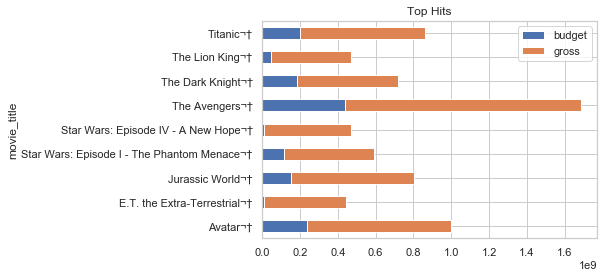

In [168]:
top10hits[['budget', 'gross']].groupby(movies['movie_title']).sum().plot.barh(stacked=True, 
                                                                              title='Top Hits')

In [169]:
top10fails.to_csv('./DS/top_flops_analysis.csv',index=True,sep=',')
top10hits.to_csv('./DS/top_hits_analysis.csv',index=True,sep=',')

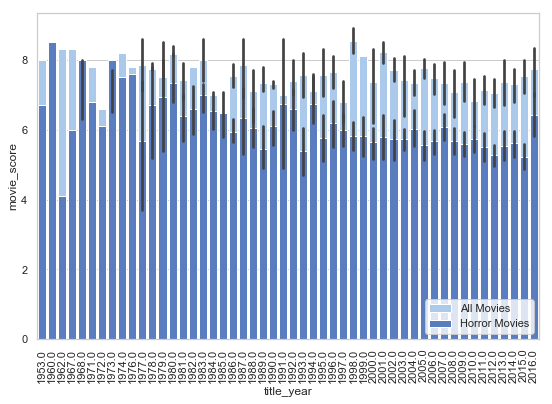

In [170]:
data = movie
df_horror = data.loc[data['genres'].str.contains('Horror')]
sns.set(style="whitegrid")


f, ax = plt.subplots(figsize=(9, 6))

sns.set_color_codes("pastel")
sns.barplot(x="title_year", y="movie_score", data=data,
            label="All Movies", color="b")

sns.set_color_codes("muted")
sns.barplot(x="title_year", y="movie_score", data=df_horror,
            label="Horror Movies", color="b")

ax.legend(loc="lower right", frameon=True)
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

(-1.1801341811856747,
 1.1237967471988415,
 -1.1233048659768554,
 1.1740462733100425)

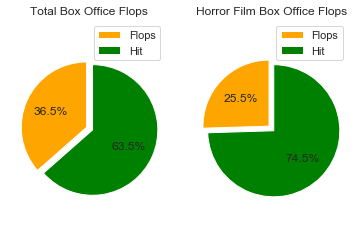

In [171]:
#Lets compare how many flops horror movies received compared to all movies.
num_flops = data[data['budget'] > data['gross']]
num_horror_flops = df_horror[df_horror['budget'] > df_horror['gross']]

fig, (ax1, ax2) = plt.subplots(1,2)

labels = ['Flops', 'Hit']
colors = ['orange', 'green']
explode = (0.1, 0)  # explode 1st slice
total_flops = [len(num_flops.index), str((len(data.index) - len(num_flops.index)))]
patches, texts, autotext = ax1.pie(total_flops,explode=explode, colors=colors, autopct='%1.1f%%',startangle=90)
ax1.set_title('Total Box Office Flops')
ax1.legend(patches, labels, loc="best")
ax1.axis('equal')


horror_flops = [len(num_horror_flops.index), str((len(df_horror.index) - len(num_horror_flops.index)))]
patches, texts, autotext = ax2.pie(horror_flops,explode=explode, colors=colors, autopct='%1.1f%%',startangle=90)
ax2.set_title('Horror Film Box Office Flops')
ax2.legend(patches, labels, loc="best")
ax2.axis('equal')

In [172]:
num_flops.to_csv('./DS/total_flops_pie.csv',index=True,sep=',')
num_horror_flops.to_csv('./DS/total_horror_flops_pie.csv',index=True,sep=',')

# Inference
* Based on the above analysis we come to the conclusion that films made on horror movie category is more hit than any other genres.
* Interesting to see that Horror films have more success at the box office compared to all movies in the dataset.
* Which implies that horror movie gategory has higher probability of being a hit movie.

In [173]:
movies['revenue']=movies['gross']-movies['budget']
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes,profit,revenue
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,523505847.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,9404152.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,-44925825.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,198130642.0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,NaN,NaN


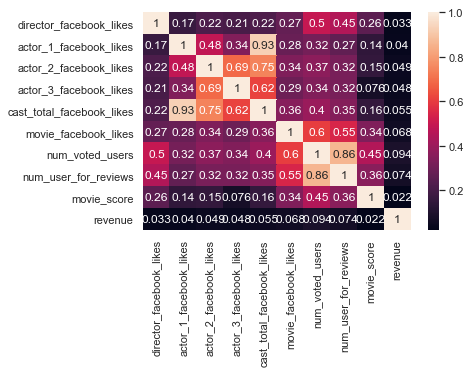

In [174]:
corrcol = ['director_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','cast_total_facebook_likes','movie_facebook_likes','num_voted_users','num_user_for_reviews','movie_score','revenue']
mvcorr = movies[corrcol]
mvcorr = mvcorr[mvcorr.director_facebook_likes != 0]
mvcorr = mvcorr[mvcorr.actor_1_facebook_likes != 0]
mvcorr = mvcorr[mvcorr.actor_2_facebook_likes != 0]
mvcorr = mvcorr[mvcorr.cast_total_facebook_likes != 0]
mvcorr = mvcorr[mvcorr.movie_facebook_likes != 0]
correlation = mvcorr[corrcol].corr(method='pearson')
#correlation.to_csv('csv/correlation.csv',encoding='utf-8')
fig, axes = plt.subplots()
sns.heatmap(correlation, annot=True)
plt.show()
plt.close()

In [176]:
topdir = movies.sort_values(by='director_facebook_likes', ascending=0)
topdir = topdir[['director_name','director_facebook_likes']]
topdir = topdir.drop_duplicates()[:50]
topdir = topdir.set_index('director_name')
topdir2 = movies[['director_name','movie_score']]
topdir2 = topdir2.groupby(['director_name']).mean()
topdir2 = topdir2.dropna()
topdir2 = topdir2.sort_values(by='movie_score', ascending=0)[:50]
topdir3 = movies[['director_name','revenue']]
topdir3 = topdir3.groupby(['director_name']).mean()
topdir3 = topdir3.dropna()
topdir3 = topdir3.sort_values(by='revenue', ascending=0)[:50]
topdir3.index
topdir4 = movies[['director_name','num_critic_for_reviews']]
topdir4 = topdir4.groupby(['director_name']).mean()
topdir4 = topdir4.dropna()
topdir4 = topdir4.sort_values(by='num_critic_for_reviews', ascending=0)[:50]
topdir4.index

Index(['Benh Zeitlin', 'Drew Goddard', 'Joss Whedon', 'Tim Miller',
       'Michel Hazanavicius', 'Fede Alvarez', 'Steve McQueen',
       'Damien Chazelle', 'Dan Gilroy', 'David Robert Mitchell', 'Ben Affleck',
       'Christopher Nolan', 'J.J. Abrams', 'Alex Garland', 'Mark Andrews',
       'Gareth Evans', 'Alan Taylor', 'Marc Webb', 'Tomas Alfredson',
       'Colin Trevorrow', 'Lee Unkrich', 'Harmony Korine', 'Neill Blomkamp',
       'Zack Snyder', 'Joon-ho Bong', 'Robert Eggers', 'Lenny Abrahamson',
       'Rupert Sanders', 'Shane Black', 'Sam Mendes', 'George Nolfi',
       'Dan Trachtenberg', 'Chris Buck', 'Duncan Jones', 'Ethan Coen',
       'Robert Stromberg', 'Joe Cornish', 'Nicolas Winding Refn',
       'Pete Docter', 'Derek Cianfrance', 'Andrew Stanton',
       'Andr√©s Muschietti', 'Ethan Maniquis', 'Alfonso Cuar√≥n',
       'Denis Villeneuve', 'Rian Johnson', 'Don Hall', 'Josh Trank',
       'Ryan Coogler', 'James Gunn'],
      dtype='object', name='director_name')

In [177]:
bestdir = topdir.index.intersection(topdir2.index)
bestdir = bestdir.intersection(topdir3.index)
bestdir = bestdir.intersection(topdir4.index)
bestdir

Index(['Christopher Nolan'], dtype='object', name='director_name')

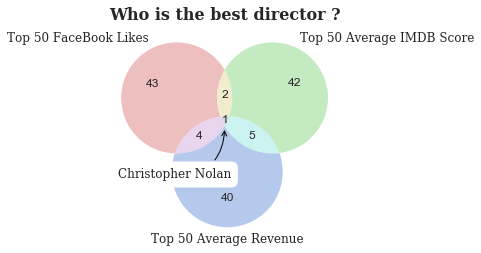

In [178]:
from matplotlib_venn import venn3, venn3_circles
set1 = set(topdir.index.values)
set2 = set(topdir2.index.values)
set3 = set(topdir3.index.values)
v = venn3([set1, set2, set3], ('Top 50 FaceBook Likes', 'Top 50 Average Movie Score', 'Top 50 Average Revenue'))
plt.title("Who is the best director ?", fontsize=16,fontweight='bold',family='serif')
bestdirstr = ''.join(bestdir)
for text in v.set_labels:
    text.set_fontsize(12)
    text.set_family('serif')
plt.annotate(bestdirstr,fontsize=12,family='serif',xy=v.get_label_by_id('111').get_position()- np.array([0, 0.05]), xytext=(-50,-50),
             ha='center',textcoords='offset points',bbox=dict(boxstyle='round,pad=0.5',fc='white'),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='black'))
plt.show()

In [179]:
correlation.to_csv('./DS/correlation_analysis.csv',index=True,sep=',')

# Inference
Based on the analysis done by comparing all the facebook likes which shows how popular a director is among masses,How much successful he is in terms of revenue generated and movie score which evolves with time we come to the conclusion that Christopher Nolan is the best director

In [180]:
file = movie
file['profit'] = file['gross'] - file['budget']

In [182]:
data = file[['genres','movie_title','language','title_year','movie_score','duration','profit']]
data.head()

,genres,movie_title,language,title_year,movie_score,duration,profit
0,Action|Adventure|Fantasy|Sci-Fi,Avatar¬†,English,2009.0,7.9,178.0,523505847.0
1,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End¬†,English,2007.0,7.1,169.0,9404152.0
2,Action|Adventure|Thriller,Spectre¬†,English,2015.0,6.8,148.0,-44925825.0
3,Action|Thriller,The Dark Knight Rises¬†,English,2012.0,8.5,164.0,198130642.0
4,Documentary,Star Wars: Episode VII - The Force Awakens¬† ...,NaN,NaN,7.1,NaN,NaN


In [183]:
s = data['genres'].str.split('|').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genres'
del data['genres']
dataf = data.join(s)
dataframe1 = dataf[dataf['movie_score']>=7]
dataframe1.head()

,movie_title,language,title_year,movie_score,duration,profit,genres
0,Avatar¬†,English,2009.0,7.9,178.0,523505847.0,Action
0,Avatar¬†,English,2009.0,7.9,178.0,523505847.0,Adventure
0,Avatar¬†,English,2009.0,7.9,178.0,523505847.0,Fantasy
0,Avatar¬†,English,2009.0,7.9,178.0,523505847.0,Sci-Fi
1,Pirates of the Caribbean: At World's End¬†,English,2007.0,7.1,169.0,9404152.0,Action


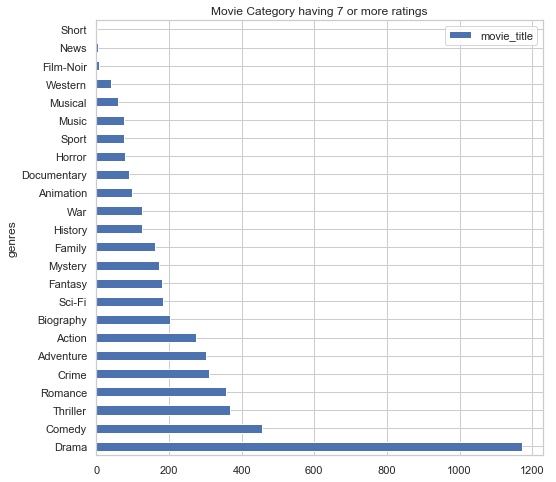

In [184]:
dataframe2 = (pd.DataFrame(dataframe1.groupby('genres').movie_title.nunique())).sort_values('movie_title', ascending=False )
dataframe2[['movie_title']].plot.barh(stacked=True, title = 'Movie Category having 7 or more ratings', figsize=(8, 8));

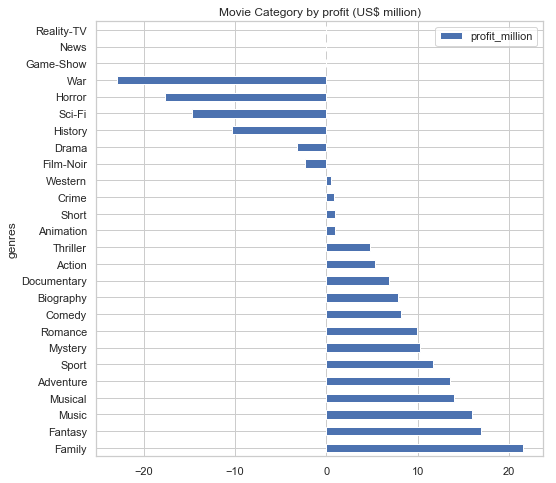

In [185]:
dataframe3 = dataf[['movie_title', 'profit','genres']]
# Checking for NaN
dataframe3.loc[dataframe3['genres'] == 'News']
dataframe4 = dataframe3.groupby(['genres']).mean()
dataframe4['profit_million'] = dataframe4['profit']/1000000
del dataframe4['profit']
dataframe4.sort_values('profit_million', ascending=False, inplace = True )
dataframe4[['profit_million']].plot.barh(stacked=True, title = 'Movie Category by profit (US$ million)', figsize=(8, 8));

In [186]:
dataframe2.to_csv('./DS/movie_score_analysis.csv',index=True,sep=',')
dataframe4.to_csv('./DS/movie_profits_analysis.csv',index=True,sep=',')

# 1.	What are your observations based on exploration of this data?


* From the above exploration of this movie_metadada.xls analysis, we can certainly say that movie category with more movie score need not be the most profitable movie category to produce movies in.
* As we can see that movie score is not directly proportional to box office collection.


# 2.	What is the recipe to make a blockbuster, profitable movie? Share your hypothesis and insights based on the data here.

* It is profitable to make movies in the following categores in the following order based on movie_metadata.xls
    1. Family
    2. Fantasy
    3. Music
    4. Musical
    5. Adventure
    6. Sport
    7. Mystry
    8. Comedy
    9. Biography
    10. Documentry
    11. Action
    12. Thriller
    13. Animation
    14. Short
    15. Crime